<a href="https://colab.research.google.com/github/MaykonDias/Analise_CancerChina/blob/main/Cancer_china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
df = pd.read_csv("china_cancer_patients_synthetic.csv")

In [50]:
df.isnull().sum()

,0
PatientID,0
Gender,0
Age,0
Province,0
Ethnicity,0
TumorType,0
CancerStage,0
DiagnosisDate,0
TumorSize,0
Metastasis,0


# **Composição dos Tipos de Câncer em um Conjunto de Dados Específico**

O gráfico apresenta que o câncer de pulmão é mais frequente, representando um quarto de todos os casos analisados. Contudo o câncer de mama e de colo de útero aparecerem com a menor representanção, isto pode representar que as campanhas de prevenção com ambos tipos de cânceres esta tendo uma eficiência.


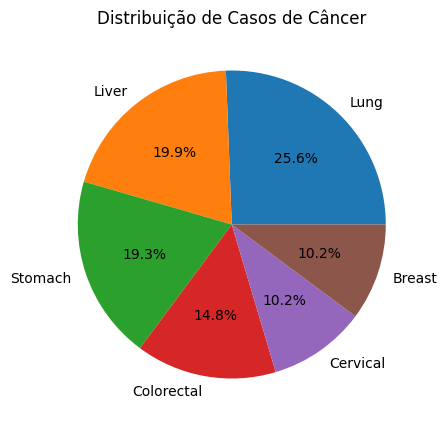

In [51]:

contagem_tumor = (df["TumorType"].value_counts())
plt.figure(figsize=(10,5))
plt.pie(contagem_tumor, autopct="%1.1f%%", labels=contagem_tumor.index)
plt.title("Distribuição de Casos de Câncer")
plt.show()

# **Matriz de Incidência de Câncer por Idade e Tipo de Tumor**

O risco aumenta significamente com o evelhecimento, pois as idades de 0 a 39 anos é predominamente por casos mais baixos. Podemos perceber que a partir dessa idade aumenta drasticamente os casos de câncer principalmente o câncer de **Pulmão**.

Podemos perceber que os demais câncer como o de **Fígado** e **Estômago** tem o padrão muito semelhante ao de **Pulmão**, pois começam com os números baixos e a partir dos 40-50 anos explode a incidência, com os picos ocorrendo nas faixas de 70-89 anos.


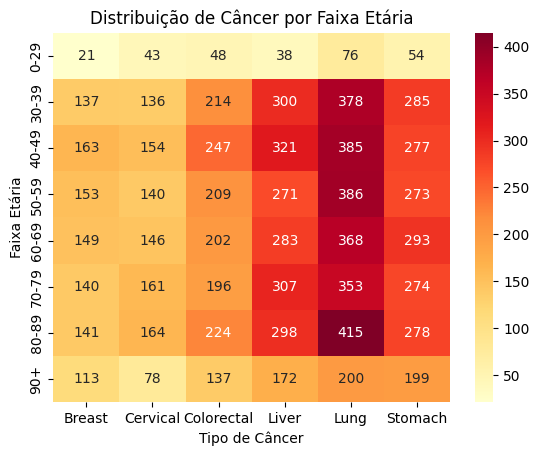

In [52]:
idades =  [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
tabela_idade_cancer = pd.crosstab(pd.cut(df["Age"], bins=idades, labels=labels, right=False),df["TumorType"])

sns.heatmap(tabela_idade_cancer, annot=True, fmt="d", cmap="YlOrRd")
plt.xlabel("Tipo de Câncer")
plt.ylabel("Faixa Etária")
plt.title("Distribuição de Câncer por Faixa Etária")
plt.show()


# **Comparação dos Estágios de Câncer nas Diferentes Faixas Etárias**

A maioria dos pacientes, independentemente da idade (exceto os mais jovens), é diagnosticada quando o câncer já está nos estágios II ou III. Isso sugere que a detecção da doença ocorre mais frequentemente quando ela já está localmente ou regionalmente avançada.
O grupo "0-29" tem um número muito baixo de casos em todos os estágios. O salto nos números de casos ao passar dos 30-39 anos aumenta drasticamente.

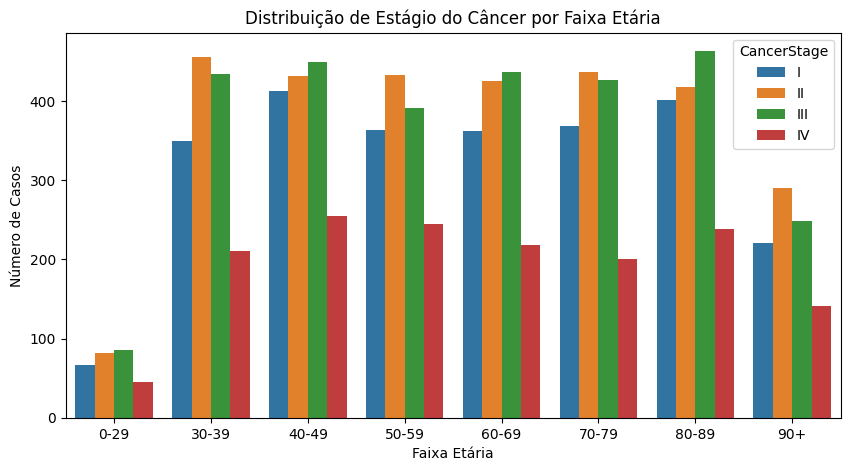

In [53]:
df["Faixa Etaria"] = pd.cut(df["Age"], bins=idades, labels=labels, right=False)
idade_estagio = (df.groupby(["Faixa Etaria", "CancerStage"], observed=False).size().reset_index(name="Idade Estagio"))
plt.figure(figsize=(10,5))
sns.barplot(idade_estagio, x="Faixa Etaria", y="Idade Estagio", hue="CancerStage")
plt.title("Distribuição de Estágio do Câncer por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Casos")
plt.show()

# **Frequência de Tipos de Câncer Conforme o Gênero Registrado**

* Os cânceres que afetam principalmente todos os gêneros (Colorretal, Fígado, Pulmão, Estômago), não obteve disparidade drástica entre homens e mulheres. Contudo os cânceres de Mama e Colo do Útero tiveram mais casos no gênero feminino.

* O câncer de **Pulmão** teve o pico mais altos comparado aos demais tipos de câncer, ou seja, trata-se de um alerta para a população.

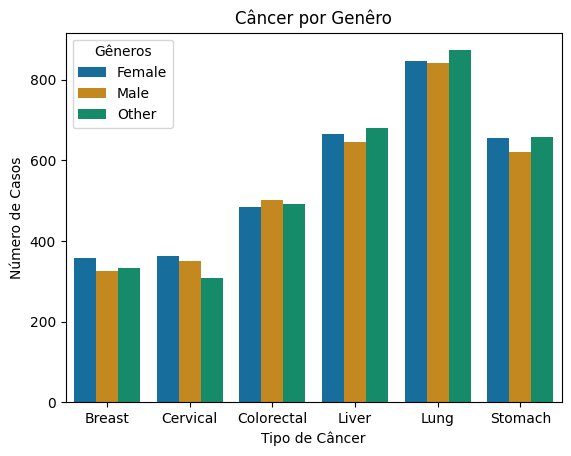

In [54]:
tabela_genero_cancer = (df.groupby(["TumorType", "Gender"]).size().reset_index(name="Contagem"))
sns.barplot(tabela_genero_cancer, x="TumorType", y="Contagem", hue="Gender", palette="colorblind")
plt.title("Câncer por Genêro")
plt.ylabel("Número de Casos")
plt.xlabel("Tipo de Câncer")
plt.legend(title="Gêneros")
plt.savefig("Grafico de cancer por genero")

# **Distribuição de Casos de Câncer por Tipo e Província na China**

Percebemos que na província **Guangdong** tem o maior salto comparado com os demais, mas isso ocorre porque a cidade tem uma das maiores populações da China.
Contudo percebemos que o câncer de **Pulmão** se destanca em todas as províncias.

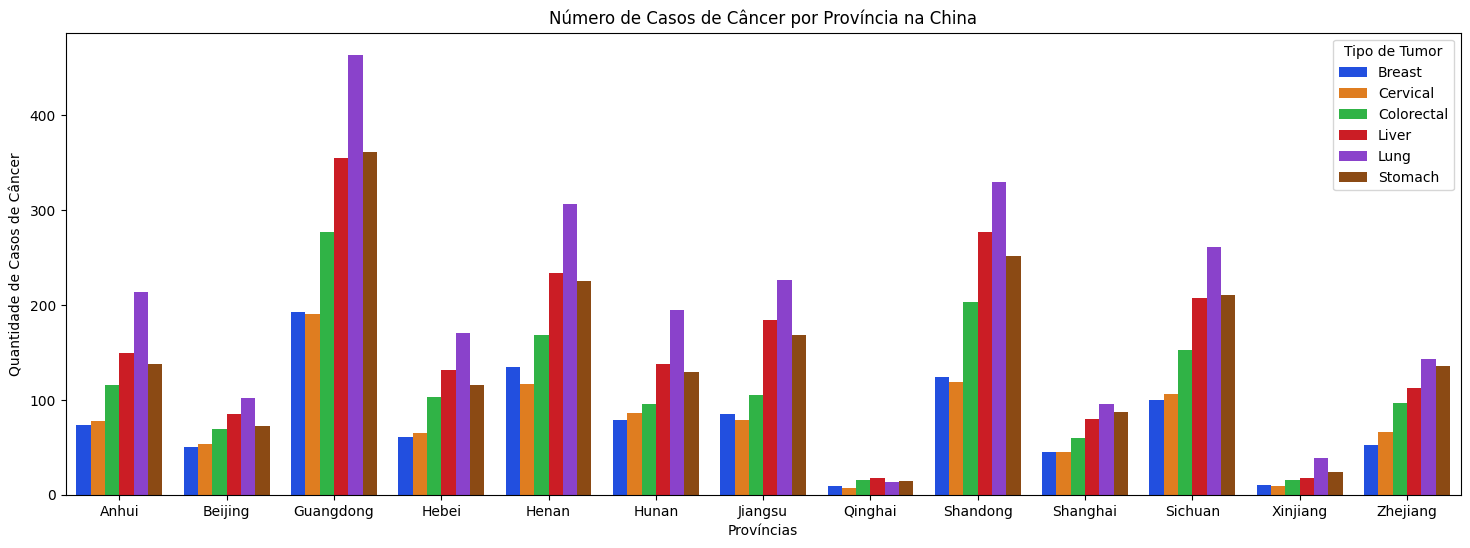

In [55]:
cancer_regiao = (df.groupby(["TumorType", "Province"]).size().reset_index(name="Contagem Local"))
plt.figure(figsize=(18,6))
sns.barplot(cancer_regiao, x="Province", y="Contagem Local", hue="TumorType", palette="bright")
plt.title("Número de Casos de Câncer por Província na China")
plt.xlabel("Províncias")
plt.ylabel("Quantidade de Casos de Câncer")
plt.legend(title="Tipo de Tumor")
plt.show()

# **Tratamentos Utilizados**

Quimioterapia é o tratamento mais usados em todos os tipos de câncer principalmente no câncer de **Pulmão**. Contudo o câncer de **Fígado** tem como principal tratamento a **Imunoterapia**.
A presença significativa da imunoterapia e da terapia alvo em vários tipos de câncer destaca a importância crescente de tratamentos mais modernos e personalizados, que vão além da quimioterapia e radiação tradicionais.

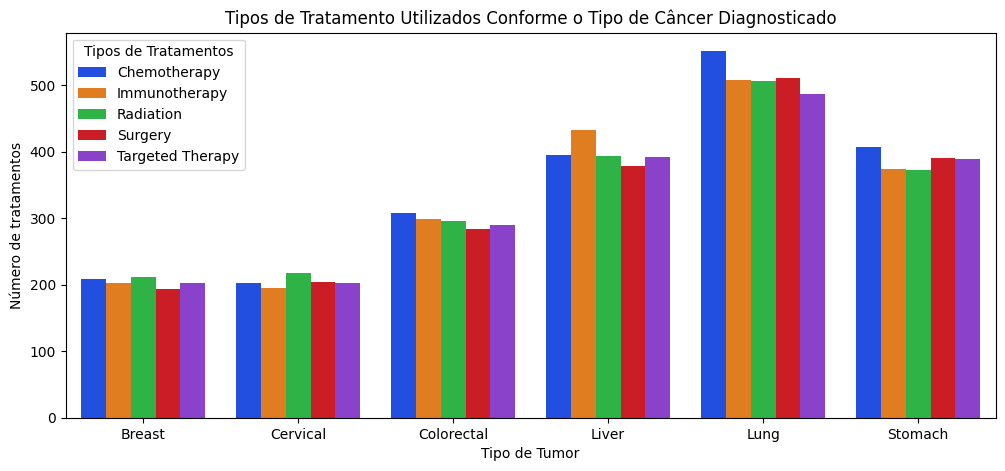

In [56]:
tratamento_cancer = (df.groupby(["TumorType", "TreatmentType"]).size().reset_index(name="Tratamento por Cancer"))
plt.figure(figsize=(12,5))
sns.barplot(tratamento_cancer, x="TumorType", y ="Tratamento por Cancer", hue="TreatmentType", palette="bright")
plt.title("Tipos de Tratamento Utilizados Conforme o Tipo de Câncer Diagnosticado")
plt.xlabel("Tipo de Tumor")
plt.ylabel("Número de tratamentos")
plt.legend(title = "Tipos de Tratamentos")
plt.show()

# **Padrões no Diagnóstico do Câncer: Uma Análise dos Estágios Clínicos por Tipo de Tumor**

O gráfico representa a quantidade de casos de câncer diagnosticados seperados por estágios.

*   O **Câncer de Pulmão** é o mais presente em todos os estágios, especialmente nos estágios II e III.

*   Os diagnósticos teve o maior pico nos estágios  II e III, isto pode indicar que seja detectada nos estágios intermediário, em vez do seu estágio inicial (I) ou no último estágio(IV).

*   O estágio(IV) obteve uma queda drástica em todos os tipos de câncer, portanto isso pode indicar que obteve sucesso na **dectecção precoce**, permitindo que a maioria dos cânceres seja diagnosticada antes de atingir o estágio(IV). Contudo também pode indicar que o estágio(IV) pode progredir tão rapidamente que o paciente falece antes do diagnóstico seja registrado.

*   O câncer de **Mama** apresenta uma quantidade relativamente estável de diagnóstico nos estágios I, II, III. Isso pode refletir a eficácia de campanhas como o **Outubro Rosa**.



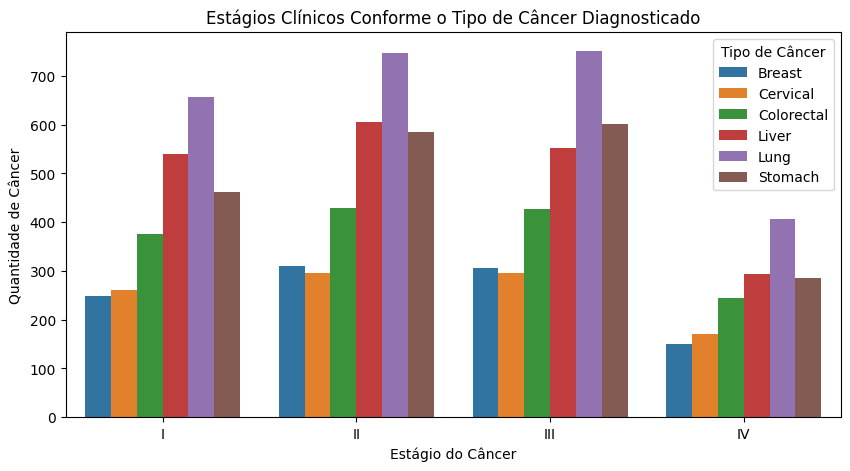

In [57]:
cancer_estagio = (df.groupby(["TumorType", "CancerStage"]).size().reset_index(name="Contagem de cancer por estagio"))
plt.figure(figsize=(10,5))
sns.barplot(cancer_estagio, x="CancerStage", y="Contagem de cancer por estagio", hue="TumorType")
plt.title("Estágios Clínicos Conforme o Tipo de Câncer Diagnosticado")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Quantidade de Câncer")
plt.legend(title="Tipo de Câncer")
plt.show()

# **Estágio pelo Gêneros**

Não há uma disparidade significativa que sugira que um gênero é diagnosticado em um determinado estágio muito mais do que outro. Por exemplo, no Estágio II, os três gêneros têm contagens altíssimas e quase idênticas.

Assim como nos gráficos anteriores, há uma queda acentuada no número de casos do Estágio III para o Estágio IV para todos os gêneros.
Isso solidifica a ideia de que o Estágio IV  é menos frequentemente registrado no momento do diagnóstico inicial em comparação com os estágios II e III. As possíveis razões para isso continuam válidas.

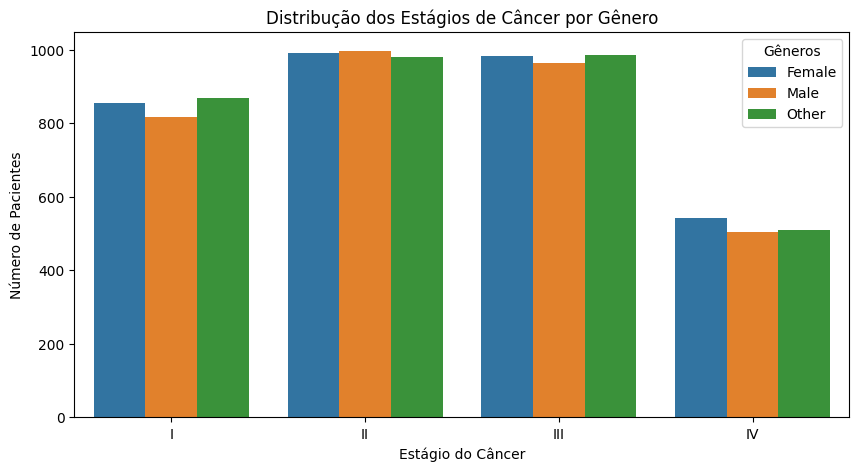

In [58]:
estagio_genero = (df.groupby(["Gender", "CancerStage"]).size().reset_index(name="Tratamento por genero"))
plt.figure(figsize=(10,5))
sns.barplot(estagio_genero, x="CancerStage", y="Tratamento por genero", hue="Gender")
plt.title("Distribução dos Estágios de Câncer por Gênero")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Número de Pacientes")
plt.legend(title="Gêneros")
plt.show()

# **Influência do Consumo de Álcool na Progressão do Câncer**
Cânceres de **Fígado** e **Estômago** têm contagens muito altas, rivalizando com o de Pulmão. Isso está alinhado com o conhecimento médico de que o consumo de álcool é um fator de risco bem estabelecido para estes tipos de câncer. O gráfico pode estar refletindo fracamente essa associação conhecida.

Observando apenas os dois grupos com dados informados, notamos um padrão consistente: para quase todos os tipos de câncer, há um número maior de casos no grupo "Ocasional" do que no grupo "Pesado". É muito importante não concluir que o consumo "Ocasional" é mais arriscado que o consumo "Pesado", pois talvez os dados apresentados mostrava uma população maior, identificada "Ocasional".

O grupo "Não Informado" não contém informação sobre o uso de álcool, isto representra limitações sobre a análise.

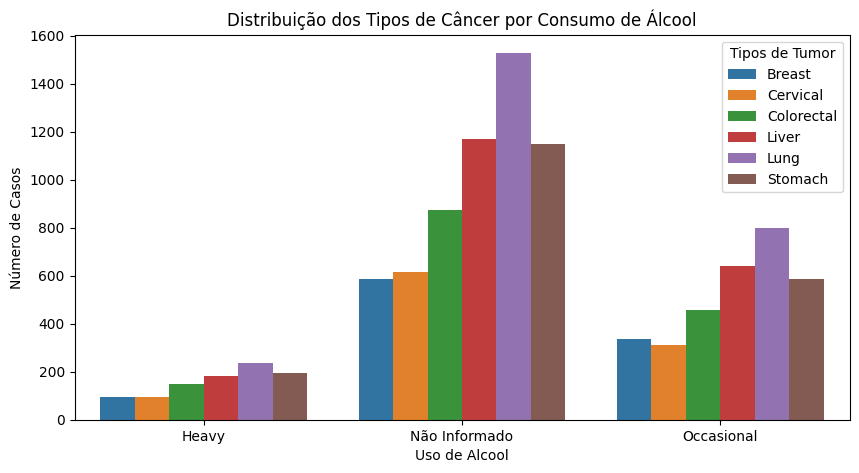

In [59]:
df["AlcoholUse"] = df["AlcoholUse"].fillna("Não Informado")
cancer_alcool = (df.groupby(["TumorType", "AlcoholUse"]).size().reset_index(name="Cancer x Alcool"))
plt.figure(figsize=(10,5))
sns.barplot(cancer_alcool, x="AlcoholUse", y="Cancer x Alcool", hue="TumorType")
plt.title("Distribuição dos Tipos de Câncer por Consumo de Álcool")
plt.xlabel("Uso de Alcool")
plt.ylabel("Número de Casos")
plt.legend(title="Tipos de Tumor")
plt.show()

# **Influência do Consumo de Cigarro na Progressão do Câncer**

A descoberta mais chocante e visualmente óbvia é que, para todos os seis tipos de câncer, a barra do grupo "Nunca fumou" é a mais alta. O câncer de pulmão em não fumantes, por exemplo, tem a maior contagem de todo o gráfico, com cerca de 1.300 casos.
Seria um erro grave concluir que "não fumar é mais perigoso". O gráfico apenas nos diz que, neste dataset, a maioria dos casos de câncer ocorreu em pessoas que nunca fumaram, muito provavelmente porque a maioria das pessoas no estudo nunca fumou.

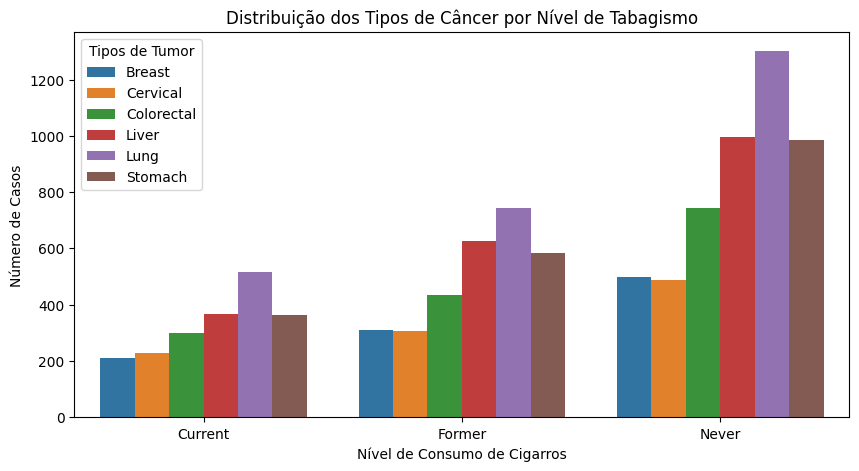

In [60]:
cancer_fuma = (df.groupby(["TumorType", "SmokingStatus"]).size().reset_index(name="Cancer x fuma"))
plt.figure(figsize=(10,5))
sns.barplot(cancer_fuma, x="SmokingStatus", y="Cancer x fuma", hue="TumorType")
plt.title("Distribuição dos Tipos de Câncer por Nível de Tabagismo")
plt.xlabel("Nível de Consumo de Cigarros")
plt.ylabel("Número de Casos")
plt.legend(title="Tipos de Tumor")
plt.show()

# **Distribuição de Tipos de Tumor por Perfil de Comorbidade, Incluindo a Ausência de Condições Crônicas**

A grande maioria dos pacientes com câncer neste conjunto de dados não possui as comorbidades específicas que foram analisadas (Diabetes, Hepatite B ou Hipertensão). Isso coloca as outras observações em perspectiva: embora as comorbidades sejam importantes, a maioria dos casos de câncer nesta amostra ocorre em pessoas sem estas três condições crônicas.

Embora existam mais casos de câncer de fígado em números absolutos no grupo sem comorbidades (porque esse grupo é muito maior), a proporção de câncer de fígado dentro do grupo de pacientes com Hepatite B é imensamente maior. O gráfico confirma que, se um paciente tem Hepatite B, há uma associação muito forte com o diagnóstico de câncer de fígado.

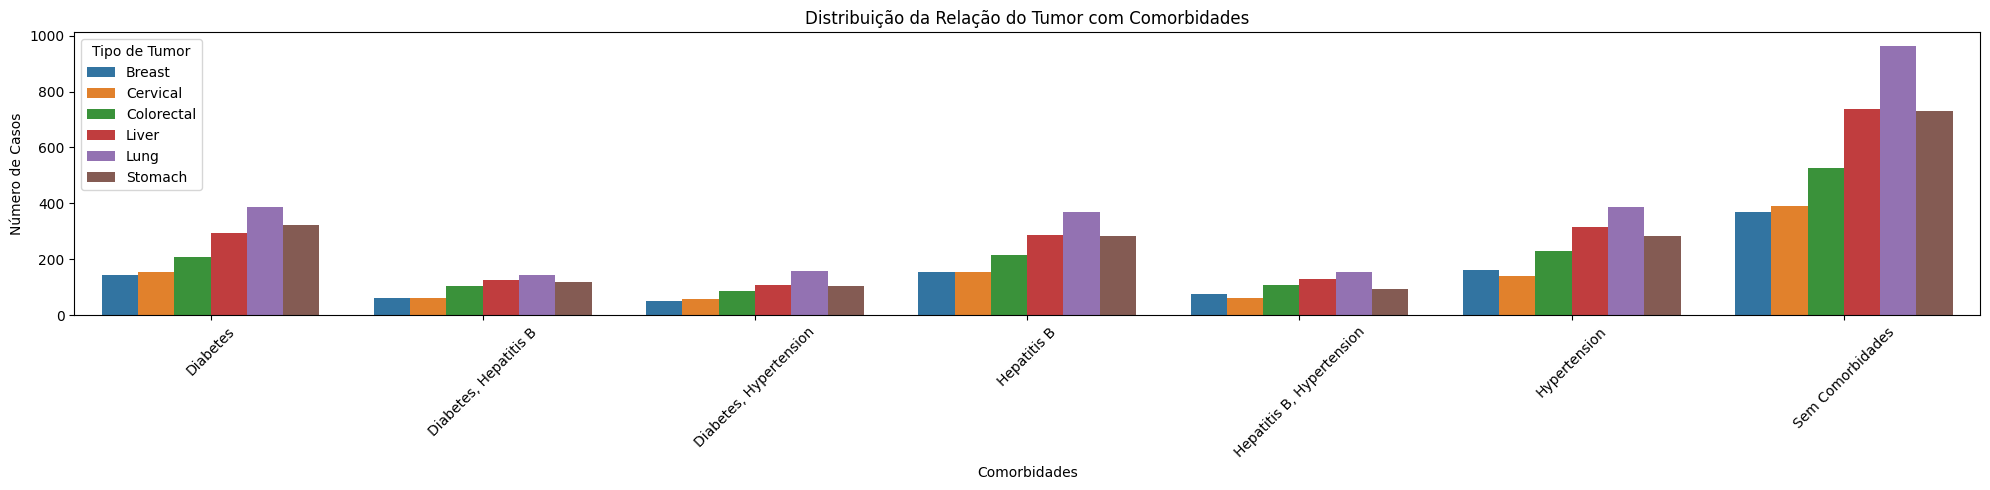

In [61]:
df['Comorbidities'] = df['Comorbidities'].fillna("Sem Comorbidades")

def padronizar_comorbidades(valor):
    if pd.isna(valor):
        return valor
    itens = [v.strip() for v in valor.split(",")]
    itens_ordenados = sorted(itens)
    return ", ".join(itens_ordenados)

df["Comorbidades_Padronizadas"] = df["Comorbidities"].apply(padronizar_comorbidades)

cancer_cormo = (df.groupby(["TumorType", "Comorbidades_Padronizadas"]).size().reset_index(name="Comorbidade x cancer"))

plt.figure(figsize=(20,5))
sns.barplot(cancer_cormo, x="Comorbidades_Padronizadas", y="Comorbidade x cancer", hue="TumorType")
plt.title("Distribuição da Relação do Tumor com Comorbidades")
plt.xlabel("Comorbidades")
plt.ylabel("Número de Casos")
plt.legend(title="Tipo de Tumor", loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Volume de Tratamentos Oncológicos por Estágio no Momento do Diagnóstico**

A grande maioria dos tratamentos, independentemente de qual seja, é administrada a pacientes que foram diagnosticados nos estágios II e III. Isso faz todo o sentido e se conecta com as análises anteriores: como a maioria dos pacientes no dataset é diagnosticada nesses estágios, é natural que a maior parte dos tratamentos também se concentre neles.
Como vimos em gráficos anteriores, há menos pacientes diagnosticados no Estágio IV em comparação com II e III.

A quimioterapia, a imunoterapia e a cirurgia são os pilares do tratamento oncológico para a população deste estudo.

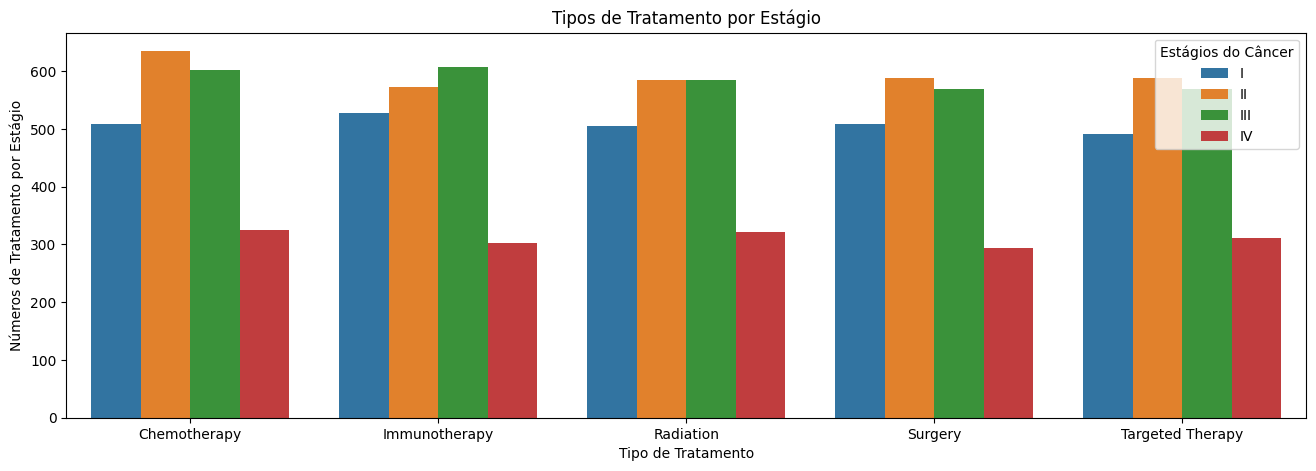

In [62]:
tratamento_estagio = (df.groupby(["TreatmentType", "CancerStage"]).size().reset_index(name="Tratamento por estagio"))
plt.figure(figsize=(16,5))
sns.barplot(tratamento_estagio, x="TreatmentType", y="Tratamento por estagio", hue="CancerStage")
plt.title("Tipos de Tratamento por Estágio")
plt.xlabel("Tipo de Tratamento")
plt.ylabel("Números de Tratamento por Estágio")
plt.legend(title="Estágios do Câncer")
plt.show()

# **Distribuição de Frequência do Tamanho do Tumor**
No gráfico **"Tamanho do Tumor"** apresenta um pico em torno dos valores 6 e 7. Isto indica que o tamanho de tumor mais comum está nessa faixa. Podemos confirmar que a maioria dos tumores é diagnosticado com o tamanho "médio", enquanto os tamanhos muito pequenos ou muito grandes são menos frequentes.


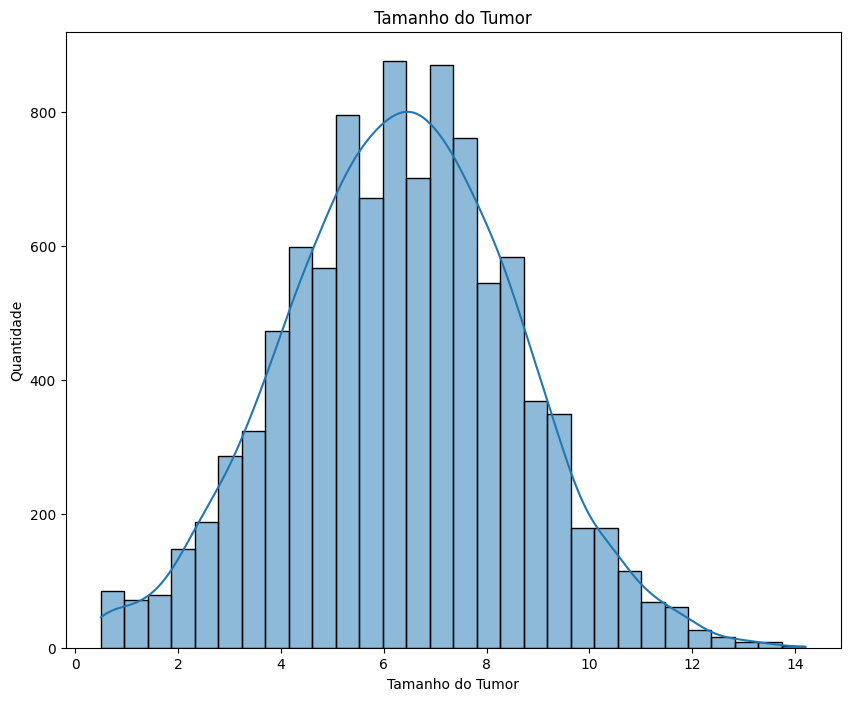

In [70]:
plt.style.use("default")
plt.figure(figsize=(10, 8))
sns.histplot(df["TumorSize"], bins=30, kde=True)
plt.title("Tamanho do Tumor")
plt.xlabel("Tamanho do Tumor")
plt.ylabel("Quantidade")
plt.show()

# **Análise do Tempo de Acompanhamento: Uma Distribuição Uniforme e suas Implicações no Estudo**

O tempo de acompanhamento dos pacientes neste estudo não segue um padrão de "pico", mas sim uma distribuição bastante uniforme ao longo do período de 5 anos. Isso significa que não existe um "tempo de acompanhamento típico" onde a maioria dos pacientes se concentra. Um paciente neste estudo tem uma probabilidade quase igual de ter sido acompanhado por 10 meses, 30 meses ou 50 meses. A quantidade de pacientes é bastante constante em quase todas as faixas de tempo.

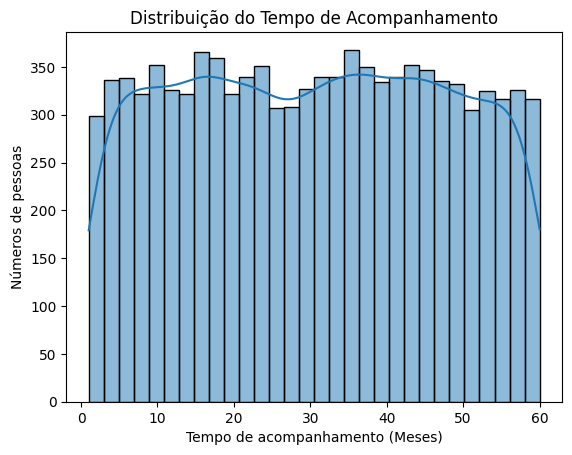

In [64]:
sns.histplot(df["FollowUpMonths"], bins=30, kde=True)
plt.title("Distribuição do Tempo de Acompanhamento")
plt.xlabel("Tempo de acompanhamento (Meses)")
plt.ylabel("Números de pessoas")
plt.show()

# **Como o Tipo de Tumor Influencia a Duração do Seguimento?**

O gráfico de **BoxPlot** apresenta resultados similares nos 6 tipos de cânceres.
O tempo médio entre os cânceres o paciente foi acompanhada por aproximadamente 30 meses (2,5 anos). Portanto o câncer de **Fígado** tem um tempo de acompanhamento menor que os demais que pode infelizmente, esta relacionado ao tempo de sobreviência.

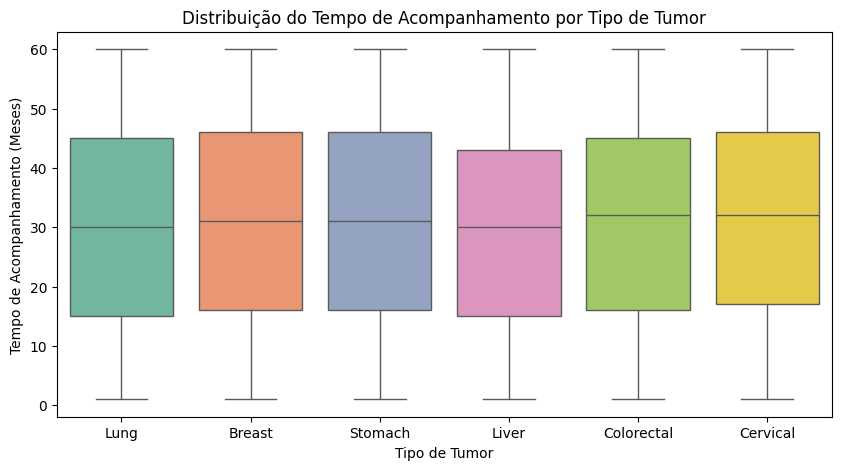

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(df, x="TumorType", y="FollowUpMonths", hue="TumorType", palette="Set2")
plt.title("Distribuição do Tempo de Acompanhamento por Tipo de Tumor")
plt.xlabel("Tipo de Tumor")
plt.ylabel("Tempo de Acompanhamento (Meses)")
plt.show()

# **Tempo de Acompanhamento por Estágio do Câncer**
O conjunto de dados é composto majoritariamente por pacientes com um longo período de acompanhamento (entre 2 e 5 anos). Este gráfico de barras e o gráfico de boxplot anterior contam a mesma história sobre o tempo de acompanhamento, mas de maneiras diferentes e complementares. O boxplot nos deu a mediana (30 meses), e este gráfico de barras nos mostrou que a maioria dos pacientes se concentra na faixa de "25-60 meses".
A grande maioria dos pacientes neste dataset, especialmente aqueles diagnosticados nos estágios I, II e III, foi acompanhada por um período considerado longo (entre 2 e 5 anos)

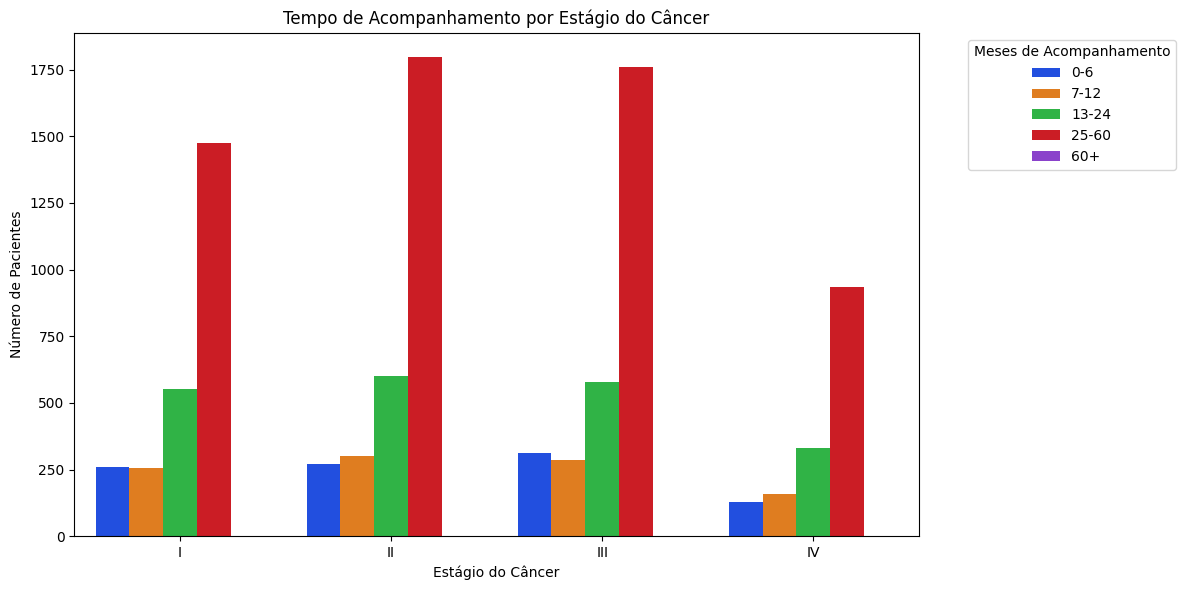

In [66]:
df['Acompanhamento estagio'] = pd.cut(df['FollowUpMonths'], bins=[0, 6, 12, 24, 60, 120], labels=["0-6", "7-12", "13-24", "25-60", "60+"])
estagio_tempo = df.groupby(["CancerStage", "Acompanhamento estagio"],observed=True).size().reset_index(name="Contagem")
plt.figure(figsize=(12,6))
sns.barplot(data=estagio_tempo, x="CancerStage", y="Contagem", hue="Acompanhamento estagio", palette="bright")
plt.title("Tempo de Acompanhamento por Estágio do Câncer")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Número de Pacientes")
plt.legend(title="Meses de Acompanhamento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# **Status de Sobrevivência dos Pacientes**

O gráfico mostra que maioria dos pacientes sobreviveram.
* Com base nos números estimados, podemos calcular a proporção de cada desfecho:
* Taxa de Sobrevivência (aproximada): (7.800 / 10.000) = 78%
* Taxa de Mortalidade (aproximada): (2.200 / 10.000) = 22%

A principal mensagem visual é quantificada: cerca de 3 em cada 4 pacientes neste estudo estavam vivos ao final do acompanhamento. É um resultado geral positivo.

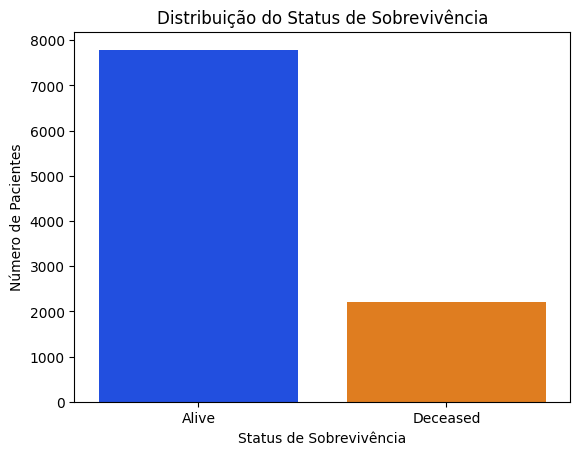

In [67]:
contagem_vida = df["SurvivalStatus"].value_counts().reset_index(name="Contagem")
sns.barplot(contagem_vida, x="SurvivalStatus", y="Contagem", hue="SurvivalStatus", palette="bright")
plt.title("Distribuição do Status de Sobrevivência")
plt.xlabel("Status de Sobrevivência")
plt.ylabel("Número de Pacientes")
plt.show()

# **Análise de Sessões de Tratamento por Estágio do Câncer**


Podemos perceber que a quantidade de ***Quimioterapia*** e **Radioterapia**, tem uma quantidade muitos próximas de sessões independente do nivel de estágio.

Os Gráficos de **Boxplots** apresentaram resultados diferentes, pois nas sessões de **Radioterapia** apresentou que abaixo dos 50% dos pacientes não obtiveram sessões do tratamento. Contudo as sessões de **Quimioterapia** teve pelo menos 7 sessões do tratamento até 20 sessões.



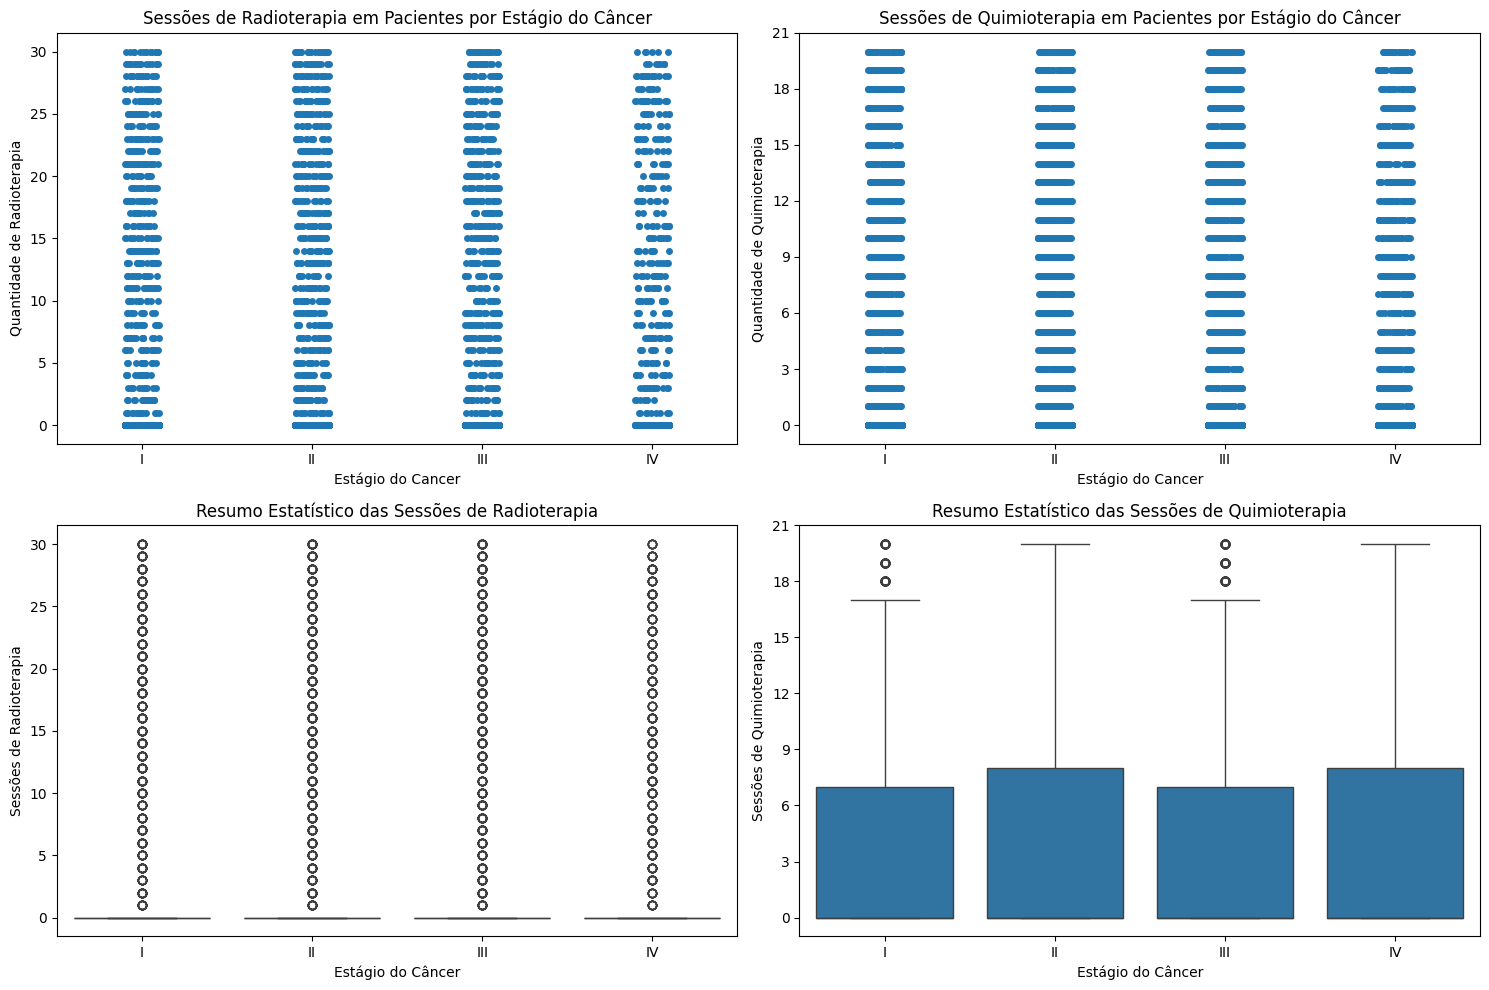

In [68]:
estagio_ordem = ["I", "II", "III", "IV"]

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.stripplot(df , x="CancerStage", y="RadiationSessions", jitter=True, order=estagio_ordem)
plt.title("Sessões de Radioterapia em Pacientes por Estágio do Câncer")
plt.xlabel("Estágio do Cancer")
plt.ylabel("Quantidade de Radioterapia")

plt.subplot(2,2,2)
ax = sns.stripplot(df , x="CancerStage", y="ChemotherapySessions", jitter=True,  order=estagio_ordem)
plt.title("Sessões de Quimioterapia em Pacientes por Estágio do Câncer")
plt.xlabel("Estágio do Cancer")
plt.ylabel("Quantidade de Quimioterapia")
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="CancerStage", y="RadiationSessions",  order=estagio_ordem)
plt.title("Resumo Estatístico das Sessões de Radioterapia")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Sessões de Radioterapia")

plt.subplot(2, 2, 4)
ax = sns.boxplot(data=df, x="CancerStage", y="ChemotherapySessions",  order=estagio_ordem)
plt.title("Resumo Estatístico das Sessões de Quimioterapia")
plt.xlabel("Estágio do Câncer")
plt.ylabel("Sessões de Quimioterapia")
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()